In [2]:
import sys
sys.path.append('../')
import numpy as np
import geometry
import matplotlib.pyplot as plt


# Initialize a transform using euler angle notation
rotation should be supplied using rotations about the z axis, y axis, and x axis in order, using units of radians

In [4]:
transform = geometry.Transform(rotation = (0,np.pi/2,0), translation = (0,0,0))

Get the 4x4 homogeneous transformation matrix using .get(). The matrix contains the 3x3 general rotation matrix in the top left corner (indices 0,0 to 3,3). The first three rows of the rightmost column contain the translation. The bottom row will always contain the vector [0,0,0,1] assuming scale is kept constant.

In [3]:
transform.get()

array([[-7.0710677e-01, -7.0710677e-01,  8.6595606e-17,  0.0000000e+00],
       [-7.0710677e-01,  7.0710677e-01,  8.6595606e-17,  0.0000000e+00],
       [-1.2246469e-16,  6.1629758e-33, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

In [4]:
transform.get(inverse=True)

array([[-7.0710677e-01, -7.0710677e-01, -1.2246469e-16, -0.0000000e+00],
       [-7.0710677e-01,  7.0710677e-01,  6.1629758e-33, -0.0000000e+00],
       [ 8.6595606e-17,  8.6595606e-17, -1.0000000e+00, -0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

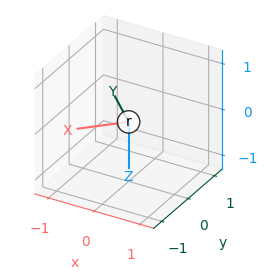

In [5]:
transform.plot_self()

# Transforming a single point

In [7]:
point = np.array([94, 141,110])

In [8]:
transform.apply_to_point(point)

array([110., 141., -94.])

Supply inverse = True to calculate the inverse transformation

In [8]:
transform.apply_to_point(transform.apply_to_point(point), inverse = True)

array([ 9.99999966e-01, -7.54746894e-49,  6.85883476e-24])

# Transforming an array of points

In [9]:
points = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])

In [10]:
transform.apply_to_points(points)

array([[-7.07106769e-01, -7.07106769e-01, -1.22464685e-16],
       [-7.07106769e-01,  7.07106769e-01,  6.16297582e-33],
       [ 8.65956060e-17,  8.65956060e-17, -1.00000000e+00]])

In [11]:
transform.apply_to_points(transform.apply_to_points(points), inverse=True)

array([[ 9.99999966e-01, -7.54746894e-49,  6.85883476e-24],
       [-7.54746894e-49,  9.99999966e-01, -6.16297582e-33],
       [ 6.85883476e-24, -6.16297582e-33,  1.00000000e+00]])

# Transforming a 3d matrix

In [12]:
array = np.zeros((64,64,64))
array[:,28:35,28:35] = 1

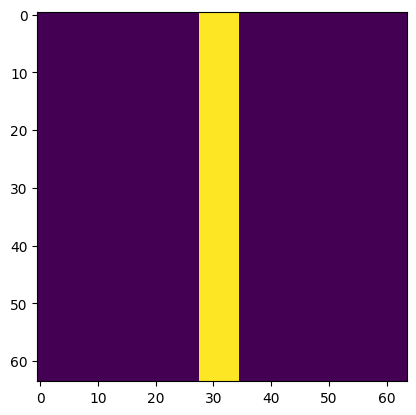

In [13]:
plt.imshow(array[:,:,31])

In [38]:
transform = geometry.Transform(rotation = (0,-np.pi/4,0), translation = (0,0,0))

array_sum:  3136.0
transformed_array_sum:  3123.878943361236
array_shape:  (64, 64, 64)
transformed_array_shape:  (110, 110, 110)


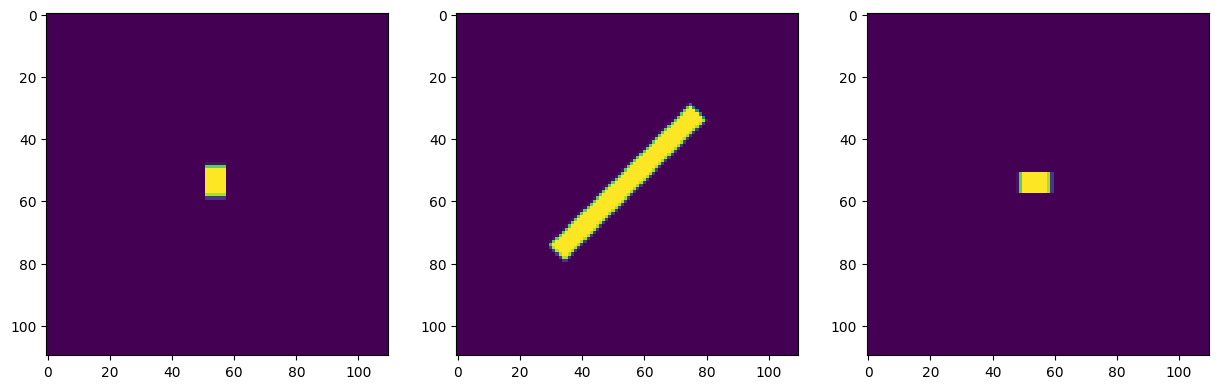

In [39]:
transformed_array = transform.apply_to_array(array,)
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].imshow(transformed_array[:,:,transformed_array.shape[2]//2])
ax[1].imshow(transformed_array[:,transformed_array.shape[1]//2,:])
ax[2].imshow(transformed_array[transformed_array.shape[0]//2,:,:])

print('array_sum: ', array.sum())
print('transformed_array_sum: ', transformed_array.sum())

print('array_shape: ', array.shape)
print('transformed_array_shape: ', transformed_array.shape)